In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors

# Scikit Training and Test Data
from sklearn.model_selection import train_test_split
# Scikit LDA модель
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Scikit модель кластеризации KMeans
from sklearn.cluster import KMeans
# Scikit Metric scoring functions
from sklearn.metrics import accuracy_score


In [49]:
# определение цветов для одной из визуализаций ниже
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

## Загрузка датасета

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()
# ?load_iris
# print(iris.DESCR)

In [26]:
# сам датасет
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)','sepal width (cm)']]

data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [27]:
# эталонная классификация
data_class = iris.target
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Модель LDA

In [31]:
# разделение на тренировочную и тестовую выборки. Training And Test Data. 
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

# X_train

In [29]:
# определение модели. Create Model
lda = LinearDiscriminantAnalysis()

# запуск обучения - метод класса. Model Fitting
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке. Prediction
lda.predict(X_test)

array([2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2])

In [30]:
# доля совпадений предсказанных и реальных значений. Accuracy Score
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

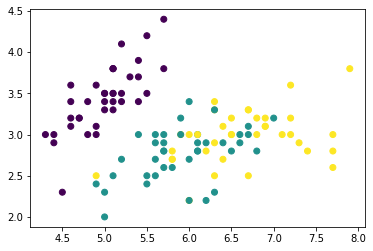

In [34]:
# визуализируем дискриминантную линию только по 2 признакам (цветом кодирован класс)
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [47]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.17742521,  8.11425594],
       [ 1.97342514, -4.57186234],
       [ 4.52236061, -4.11686316]])

In [45]:
# центроиды
lda.means_

array([[4.98205128, 3.4025641 ],
       [5.92571429, 2.75142857],
       [6.56315789, 2.99473684]])

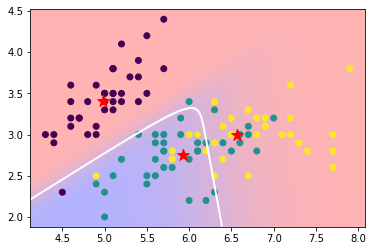

In [43]:
# этот код можно заимствовать, он помогает сделать визуализацию

# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
# метод predict probability (чем то напоминает predict). На входе - Numpy преобразования с помощью методов c_ и ravel()
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

## Модель KMeans

In [61]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_train)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

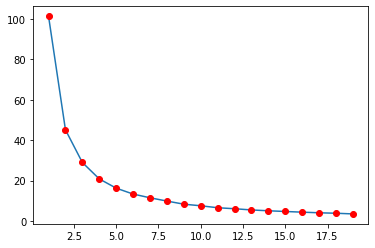

In [62]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

**Принимаем решение**: количество кластеров сделать равным 4 - это точка кривой, где она сглаживается.

In [63]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_train)
# clusters

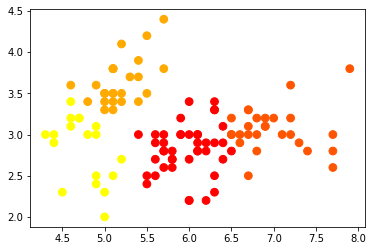

In [60]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], cmap='autumn', c=clusters, s=60)